# **Google Runoff Reanalysis & Reforecast dataset (GRRR) extraction**

This notebook is complementary to the colab (https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing) which facilitates reading the GRRR.

GRRR consists of hydrologic predictions by Google state-of-the-art (SOTA) hydrologic model, an improved version of the model described in the Nature article (https://www.nature.com/articles/s41586-024-07145-1), with full global coverage and daily resolution. It includes:
* Streamflow reanalysis data for ±1M hybas's (hydrological basin) for 1980 - 2023, on which, too, return period values are based and calculated (the ‘severity threshold levels’ we already knew);
* Streamflow reforecast data for ±1M hybas's for 2016 - 2022, with 7-day lead times.


##### **Extract Mali data**

In [1]:
import analyse


Running __init__.py for GoogleFloodHub-data-analyser

Running __init__.py for GoogleFloodHub-data-extractor
GoogleFloodHub-data-extractor initialized

GoogleFloodHub-data-analyser initialized



In [ ]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = \
    analyse.get_country_data('Mali','2024-07-08', '2024-10-08')

In [6]:
print(df_Mali_gauges['gaugeId'])

0     hybas_1120641660
1     hybas_1120650110
2     hybas_1120661040
3     hybas_1120679780
4     hybas_1120689830
5     hybas_1120705070
6     hybas_1120737100
7     hybas_1120739110
8     hybas_1120758950
9     hybas_1120766460
10    hybas_1121890140
11    hybas_1121893090
12    hybas_1121895840
13    hybas_1121900350
14    hybas_1121905290
15    hybas_1121919510
Name: gaugeId, dtype: object


Replace the comment-block (1) with comment-block (2) in colab (of the aforementioned URL) for the Mali data to download

In [7]:
""" comment-block (1)
gauge_reforecast_ds = reforecast_ds.sel(gauge_id=hybas_id).compute()
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()
"""

""" comment-block (2)
Mali_hybases = [
  'hybas_1120641660',
  'hybas_1120650110',
  'hybas_1120661040',
  'hybas_1120679780',
  'hybas_1120689830',
  'hybas_1120705070',
  'hybas_1120737100',
  'hybas_1120739110',
  'hybas_1120758950',
  'hybas_1120766460',
  'hybas_1121890140',
  'hybas_1121893090',
  'hybas_1121895840',
  'hybas_1121900350',
  'hybas_1121905290',
  'hybas_1121919510'
]

for hybas_id in Mali_hybases:
  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()
  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()
  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()

  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')
  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')
  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')

  files.download(f'{hybas_id}_reforecast_ds.nc')
  files.download(f'{hybas_id}_reanalysis_ds.nc')
  files.download(f'{hybas_id}_return_periods_ds.nc')
"""

" comment-block (2)\nMali_hybases = [\n  'hybas_1120641660',\n  'hybas_1120650110',\n  'hybas_1120661040',\n  'hybas_1120679780',\n  'hybas_1120689830',\n  'hybas_1120705070',\n  'hybas_1120737100',\n  'hybas_1120739110',\n  'hybas_1120758950',\n  'hybas_1120766460',\n  'hybas_1121890140',\n  'hybas_1121893090',\n  'hybas_1121895840',\n  'hybas_1121900350',\n  'hybas_1121905290',\n  'hybas_1121919510'\n]\n\nfor hybas_id in Mali_hybases:\n  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()\n  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()\n  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()\n\n  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')\n  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')\n  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')\n\n  files.download(f'{hybas_id}_reforecast_ds.nc')\n  files.download(f'{hybas_id}_reanalysis_ds.nc')\n  files.download(f'{h

This method is not robust, and due to many reoccuring downloads possible overloading colabs RAM or whatever, some files fail to download. This can probably worked around by using time.sleep() or some outer loop with a lag, but the safest option is to download one-by-one by uncommenting hybas ID's:

In [ ]:
""" 
# hybas_id = 'hybas_1120641660'
# hybas_id = 'hybas_1120650110'
# hybas_id = 'hybas_1120661040'
# hybas_id = 'hybas_1120679780'
# hybas_id = 'hybas_1120689830'
# hybas_id = 'hybas_1120705070'
# hybas_id = 'hybas_1120737100'
# hybas_id = 'hybas_1120739110'
# hybas_id = 'hybas_1120758950'
# hybas_id = 'hybas_1120766460'
# hybas_id = 'hybas_1121890140'
# hybas_id = 'hybas_1121893090'
# hybas_id = 'hybas_1121895840'
# hybas_id = 'hybas_1121900350'
# hybas_id = 'hybas_1121905290'
# hybas_id = 'hybas_1121919510'
"""

Now, download the manually added data (after putting it in folders (manually or with os/shutil package))

In [8]:
import xarray as xr

In [12]:
# First, try one hybas_id to test:
hybas_id = 'hybas_1120641660'

ds_reanalysis_1120641660 = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas_id}_reanalysis_ds.nc')
ds_reforecast_1120641660 = xr.open_dataset(f'../data/GRRR/reforecast/{hybas_id}_reforecast_ds.nc')
ds_return_ps_1120641660 = xr.open_dataset(f'../data/GRRR/return_periods/{hybas_id}_return_periods_ds.nc')

<xarray.Dataset>
Dimensions:     (time: 16063)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2023-12-23
    gauge_id    object ...
Data variables:
    streamflow  (time) float32 ...


In [13]:
print(type(ds_reanalysis_1120641660))

<class 'xarray.core.dataset.Dataset'>


Some plotting functions/utils (partly copied from the same notebook):

In [21]:
from typing import Any, List, Tuple
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


def add_return_periods(
        ax: mpl.axes, gauge_return_periods_ds: xr.core.dataset.Dataset, thresholds: Tuple[int]
    ) -> None:
    """
    Adds horizontal lines with return periods to a plot

    :param ax: axis to add the return periods to
    :param gauge_return_periods_ds: return periods dataset
    :param thresholds: list of thresholds to add return periods for
    """
    colors = ('yellow', 'orange', 'red', 'brown', 'black')

    for threshold, color in zip(thresholds, colors):
        ax.axhline(
            y = gauge_return_periods_ds[f'return_period_{threshold}'].item(),
            color = color,
            label = f'{threshold}-yr return period',
            linestyle = '--'
        )


def plot_reforecast(
        issue_time_start_date: str, issue_time_end_date: str,
        ds_reforecast: xr.core.dataset.Dataset,
        ds_return_periods: xr.core.dataset.Dataset,
        thresholds: Tuple[int] = ('2', '5', '20')
    ) -> None:
    """ 
    Plots reforecast data for a give time range

    :param issue_time_start_date: start date for the issue time
    :param issue_time_end_date: end date for the issue time
    :param gauge_return_periods_ds: return periods dataset
    :param thresholds: list of thresholds to add return periods for
    """
    fig, ax = plt.subplots(figsize = (20, 4))
    issue_times = ds_reforecast.sel(issue_time = \
                        slice(issue_time_start_date, issue_time_end_date))['issue_time']

    for issue_time in issue_times:      # select issue time slice
        issue_time_slice = ds_reforecast.sel(issue_time = issue_time)
                                        # convert lead time to dates and
                                        # divide by 10**9 to convert to seconds
        lead_time_to_dates = [pd.to_datetime(issue_time.values) + \
                              datetime.timedelta(seconds = (lead_time.item() // 10**9)) \
                                for lead_time in issue_time_slice['lead_time']]
                                        # for each lead time, plot the streamflow
        ax.plot(lead_time_to_dates, issue_time_slice.streamflow.values)

    add_return_periods(ax, ds_return_periods, thresholds)
    plt.legend(loc = 'upper right')
    plt.show()


def plot_reanalysis(start_date: str, end_date: str,
                    ds_reanalysis: xr.core.dataset.Dataset,
                    ds_return_periods: xr.core.dataset.Dataset,
                    thresholds = ('2', '5', '20')
    ) -> None:
    """
    Plots reanalysis data for a given time range

    :param start_date: start date for the time range
    :param end_date: end date for the time range
    :param gauge_reanalysis_ds: reanalysis dataset
    :param gauge_return_periods_ds: return periods dataset
    :param thresholds: list of thresholds to add return periods for
    """
    fig, ax = plt.subplots(figsize = (20, 4))
    ds_subset = ds_reanalysis.streamflow.sel(time = slice(start_date, end_date))
    
    ax.plot(ds_subset.time, ds_subset.values)
    add_return_periods(ax, ds_return_periods, thresholds)
    plt.legend(loc = 'upper right')
    plt.show()

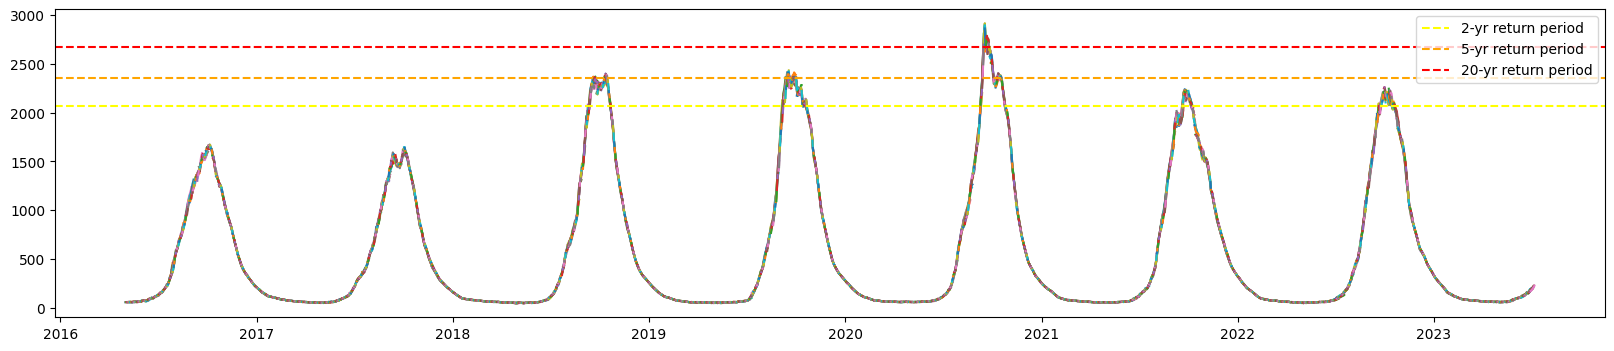

In [18]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

plot_reforecast(issue_time_start_date, issue_time_end_date,
                ds_reforecast_1120641660, ds_return_ps_1120641660)

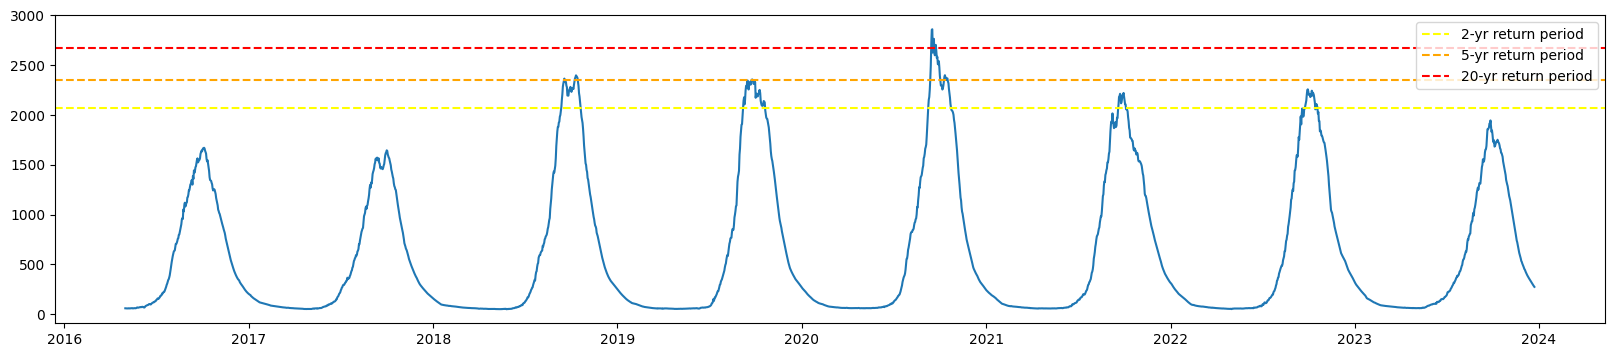

In [22]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

plot_reanalysis(issue_time_start_date, issue_time_end_date,
                ds_reanalysis_1120641660, ds_return_ps_1120641660)